In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility"
# errors are ok, per https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [162]:
file_prefix = '../data/362070167_T_ONTIME-'
#file_month_range = range(1,3)
file_month_range = range(1,13)

In [163]:
dtypes = {
    'CARRIER': 'category'
    ,'TAIL_NUM': 'category'
    ,'ORIGIN': 'category'
    ,'ORIGIN_CITY_NAME': 'category'
    ,'DEST': 'category'
    ,'DEST_CITY_NAME': 'category'
    ,'CANCELLATION_CODE': 'category'}

In [137]:
d_bts_by_month = []
for month_index in file_month_range:
    d_bts_by_month.append(pd.read_csv(f'{file_prefix}{month_index}.csv', dtype=dtypes))

In [164]:
for idx, d_month in enumerate(d_bts_by_month):
    print(idx, d_month.shape)

0 (450017, 34)
1 (410517, 34)
2 (488597, 34)
3 (468329, 34)
4 (486483, 34)
5 (494266, 34)
6 (509070, 34)
7 (510451, 34)
8 (458727, 34)
9 (479797, 34)
10 (454162, 34)
11 (464205, 34)


In [166]:
d_bts = pd.concat(d_bts_by_month, ignore_index=True)
d_bts.shape

(5674621, 34)

Even if we read the data individually as categories, we don't retain that type after the concat for every field (probably because the fields have different unique values). We can get back to the categorical type, and a smaller dataframe, by reapplying the type.

In [167]:
for field in dtypes:
    d_bts[field] = d_bts[field].astype(dtypes[field])

And we'll get a datetime too.

In [168]:
d_bts['FL_DATE'] = pd.to_datetime(d_bts['FL_DATE'])

In [169]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [170]:
mem_usage(d_bts)

'1234.44 MB'

In [171]:
d_bts.dtypes

FL_DATE                datetime64[ns]
CARRIER                      category
TAIL_NUM                     category
FL_NUM                          int64
ORIGIN                       category
ORIGIN_CITY_NAME             category
DEST                         category
DEST_CITY_NAME               category
CRS_DEP_TIME                    int64
DEP_TIME                      float64
DEP_DELAY                     float64
DEP_DELAY_NEW                 float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
CRS_ARR_TIME                    int64
ARR_TIME                      float64
ARR_DELAY                     float64
ARR_DELAY_NEW                 float64
CANCELLED                     float64
CANCELLATION_CODE            category
DIVERTED                      float64
CRS_ELAPSED_TIME              float64
ACTUAL_ELAPSED_TIME           float64
AIR_TIME                      float64
FLIGHTS     

In [172]:
d_bts[:1]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,147.0,121.0,1.0,802.0,NaN,NaN,NaN,NaN,NaN,NaN


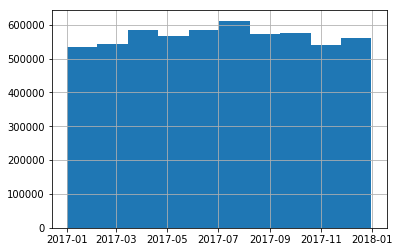

In [173]:
d_bts['FL_DATE'].hist()

In [174]:
d_airports = pd.read_csv('../data/airports.csv')
d_airports.shape

(7184, 14)

In [175]:
d_airports[:3]

,AirportID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzTimezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


In [176]:
[d_bts.columns, d_airports.columns]

[Index(['FL_DATE', 'CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN',
        'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
        'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'TAXI_OUT', 'WHEELS_OFF',
        'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
        'ARR_DELAY_NEW', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
        'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
        'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
        'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 33'],
       dtype='object'),
 Index(['AirportID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
        'Longitude', 'Altitude', 'Timezone', 'DST', 'TzTimezone', 'Type',
        'Source'],
       dtype='object')]

In [177]:
d = pd.merge(left=d_bts, right=d_airports, how='left', left_on='ORIGIN', right_on='IATA')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TzTimezone,Type,Source
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,ORD,KORD,41.978600,-87.904800,672.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,LAS,KLAS,36.080101,-115.152000,2181.0,-8,A,America/Los_Angeles,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,DCA,KDCA,38.852100,-77.037697,15.0,-5,A,America/New_York,airport,OurAirports


In [178]:
d.iloc[0]

FL_DATE                                 2017-01-01 00:00:00
CARRIER                                                  AA
TAIL_NUM                                             N153AA
FL_NUM                                                 1766
ORIGIN                                                  ORD
ORIGIN_CITY_NAME                                Chicago, IL
DEST                                                    DFW
DEST_CITY_NAME                        Dallas/Fort Worth, TX
CRS_DEP_TIME                                            710
DEP_TIME                                                705
DEP_DELAY                                                -5
DEP_DELAY_NEW                                             0
TAXI_OUT                                                 12
WHEELS_OFF                                              717
WHEELS_ON                                               918
TAXI_IN                                                  14
CRS_ARR_TIME                            

In [179]:
d = pd.merge(left=d, right=d_airports, how='left', left_on='DEST', right_on='IATA', suffixes=['_orig','_dest'])
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,IATA_dest,ICAO_dest,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,DFW,KDFW,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports


In [180]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [181]:
d_carriers = pd.read_csv('../data/CarrierLookup.csv')
d_carriers.shape

(1903, 2)

In [182]:
d = pd.merge(left=d, right=d_carriers, left_on='CARRIER', right_on='Code')
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,Latitude_dest,Longitude_dest,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest,Code,Description
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc. (1960 - )
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,32.896801,-97.038002,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc. (1960 - )
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports,AA,American Airlines Inc. (1960 - )


In [183]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [184]:
d_carriers_unique = pd.read_csv('../data/UniqueCarrierLookup.csv')
d_carriers_unique.shape

(1645, 2)

In [185]:
d = pd.merge(left=d, right=d_carriers_unique, left_on='CARRIER', right_on='Code', suffixes=['_normal','_unique'])
d[:3]

,FL_DATE,CARRIER,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,...,Altitude_dest,Timezone_dest,DST_dest,TzTimezone_dest,Type_dest,Source_dest,Code_normal,Description_normal,Code_unique,Description_unique
0,2017-01-01,AA,N153AA,1766,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",710,705.0,...,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc. (1960 - ),AA,American Airlines Inc.
1,2017-01-01,AA,N192AA,1767,LAS,"Las Vegas, NV",DFW,"Dallas/Fort Worth, TX",1235,1235.0,...,607.0,-6,A,America/Chicago,airport,OurAirports,AA,American Airlines Inc. (1960 - ),AA,American Airlines Inc.
2,2017-01-01,AA,N829AA,1768,DCA,"Washington, DC",MIA,"Miami, FL",1020,1015.0,...,8.0,-5,A,America/New_York,airport,OurAirports,AA,American Airlines Inc. (1960 - ),AA,American Airlines Inc.


In [186]:
d.iloc[0]

FL_DATE                                    2017-01-01 00:00:00
CARRIER                                                     AA
TAIL_NUM                                                N153AA
FL_NUM                                                    1766
ORIGIN                                                     ORD
ORIGIN_CITY_NAME                                   Chicago, IL
DEST                                                       DFW
DEST_CITY_NAME                           Dallas/Fort Worth, TX
CRS_DEP_TIME                                               710
DEP_TIME                                                   705
DEP_DELAY                                                   -5
DEP_DELAY_NEW                                                0
TAXI_OUT                                                    12
WHEELS_OFF                                                 717
WHEELS_ON                                                  918
TAXI_IN                                                

In [187]:
d['Description_unique'].value_counts(dropna=False)

Southwest Airlines Co.      1222518
Delta Air Lines Inc.         923560
American Airlines Inc.       896348
SkyWest Airlines Inc.        695899
ExpressJet Airlines Inc.     679082
United Air Lines Inc.        535187
Virgin America               361976
JetBlue Airways              298654
Spirit Air Lines             208638
Alaska Airlines Inc.         185068
Frontier Airlines Inc.       101075
Hawaiian Airlines Inc.        87145
Name: Description_unique, dtype: int64

In [188]:
d['CARRIER'].value_counts(dropna=False)

WN    1222518
DL     923560
AA     896348
OO     695899
EV     679082
UA     535187
VX     361976
B6     298654
NK     208638
AS     185068
F9     101075
HA      87145
Name: CARRIER, dtype: int64

In [189]:
mem_usage(d)

'12515.86 MB'